# Geocoding with geopandas

## goals of the tutorial
- from string to lat/long
- from lat/lon to string


### requirements
- python knowledge
- geopandas

### status 
*"I'm a geo-soothsayer"*

---

In [2]:
#commands needed if you work with mybinder
!conda install -y geopandas
#!conda install -y matplotlib
!conda install -y folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
%matplotlib inline
import geopandas as gpd


<div class="alert alert-info" style="font-size:120%">
<b>GEOCODING service</b>
<img src="https://geopy.readthedocs.io/en/stable/_images/logo-wide.png">
the geopandas module is based on geopy
<ul>
    <li>all the goecoders service are available here: <a href="https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders">https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders</a></li>
</ul>

## choose the right service
![](img/getlonlat.png)

# geocoding

In [4]:
cols = ['city']
names = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
cities = gpd.GeoDataFrame(names,columns=cols)

In [5]:
%%time
geo_cities = gpd.tools.geocode(cities.city, provider="arcgis")

CPU times: user 124 ms, sys: 20.6 ms, total: 144 ms
Wall time: 4.78 s


In [6]:
geo_cities

,geometry,address
0,POINT (12.49565000000007 41.90322000000003),Roma
1,POINT (13.36112000000003 38.12207000000006),Palermo
2,POINT (11.11926000000005 46.07005000000004),Trento
3,POINT (8.938980000000072 44.41039000000006),Genova
4,POINT (16.86666000000002 41.12587000000008),Bari
5,POINT (13.77269000000007 45.65757000000008),Trieste
6,POINT (14.25226000000004 40.84014000000008),Napoli
7,POINT (9.110490000000027 39.21454000000006),Cagliari
8,POINT (15.55308000000002 38.17837000000003),Messina
9,POINT (18.16802000000007 40.35796000000005),Lecce


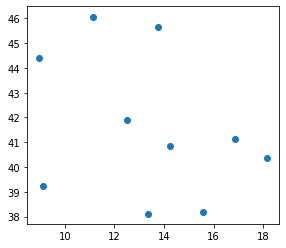

In [7]:
geo_cities.plot()

# reverse geocoding

In [8]:
from geopy.geocoders import Nominatim

In [9]:
point = geo_cities.geometry[8]

In [10]:
latlon = str(point.y) + "," + str(point.x)

In [11]:
geolocator = Nominatim(user_agent="bigdive")

In [12]:
location = geolocator.reverse(latlon)

In [13]:
location.raw

{'place_id': 141396713,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 279790011,
 'lat': '38.1783837842552',
 'lon': '15.5530648653528',
 'display_name': 'Via La Farina, Zaera, IV Circoscrizione, Messina, ME, SIC, 98123, Italia',
 'address': {'road': 'Via La Farina',
  'neighbourhood': 'Zaera',
  'suburb': 'IV Circoscrizione',
  'city': 'Messina',
  'county': 'ME',
  'state': 'SIC',
  'postcode': '98123',
  'country': 'Italia',
  'country_code': 'it'},
 'boundingbox': ['38.1781352', '38.1799635', '15.5528384', '15.5545034']}

# suggestion for a good geocoding
more details you add and more fortune you have to obtain a good result

In [14]:
q="Via Maria Vittoria, 38"

In [15]:
point = gpd.tools.geocode(q, provider="arcgis")

In [16]:
point

,geometry,address
0,POINT (-38.52358999999996 -13.00559999999996),Via Maria


In [17]:
import folium

In [18]:
map_point = folium.Map([point.geometry.y,point.geometry.x], zoom_start=18, tiles="OpenStreetMap")
folium.GeoJson(point.to_json()).add_to(map_point)
map_point

add details like city and State

In [19]:
q="Via Maria Vittoria, 38, Torino, Italia"

In [20]:
point = gpd.tools.geocode(q, provider="arcgis")

In [21]:
point

,geometry,address
0,POINT (7.691644601792615 45.06523276429633),"Via Maria Vittoria 38, 10123, Torino"


In [22]:
map_point = folium.Map([point.geometry.y,point.geometry.x], zoom_start=18, tiles="OpenStreetMap")
folium.GeoJson(point.to_json()).add_to(map_point)
map_point

Try a different geocoder

In [26]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim")

In [27]:
point_nominatim

,geometry,address
0,POINT (7.6917905 45.065195),"Rinascimenti Sociali, 38, Via Maria Vittoria, ..."


In [28]:
map_point = folium.Map([point_nominatim.geometry.y,point.geometry.x], zoom_start=18, tiles="OpenStreetMap")
folium.GeoJson(point_nominatim.to_json()).add_to(map_point)
map_point

calculate the difference between the two points

In [ ]:
point.to_crs('epsg:32632').geometry.distance(point_nominatim.geometry.to_crs('epsg:32632'))